# Data Cleaning

#### Data Source: http://www.dcmetrometrics.com/data

 ## hotcars.csv

 HotCar report data. Each hot car report is from a tweet mentioning a single valid 4 digit Metro car number.

 - *car_number*: Metro car number
 - *color*: Line color
 - *time*: Tweet time (UTC)
 - *text*: Tweet text
 - *handle*: Twitter user's screen name
 - *user_id*: Twitter user's user_id
 - *tweet_id*

# Reading in Libraries

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('hotcars.csv')

In [5]:
data.head()

,car_number,color,time,text,handle,user_id,tweet_id
0,1001,RED,2013-05-28T12:39:54+00:00,"Was just on metro hot car #1001 (red line), an...",CarChickMWB,18249348.0,3.393600e+17
1,1188,RED,2013-05-28T12:50:53+00:00,@FixWMATA @unsuckdcmetro @wmata RL #HotCar 118...,DiavoJinx,403520304.0,3.393630e+17
2,1068,GREEN,2013-05-28T21:06:20+00:00,"oh good, another hot car on the metro. green l...",lexilooo,16174883.0,3.394880e+17
3,2066,ORANGE,2013-05-28T21:15:23+00:00,#HotCar 2066 on OL to New Carrollton. Air is ...,TheHornGuy,40506740.0,3.394900e+17
4,1043,BLUE,2013-05-28T22:08:07+00:00,Car 1043 on the blue line heading to Largo is ...,jessydumpling,263763147.0,3.395030e+17


# Breaking down and Cleaning the Data
1. Rename 'time' column to 'time_stamp'
    - break down the 'time_stamp' into columns ('time', 'full_date', 'year', 'month', 'date')
   
   
2. Delete 'tweet_id' & 'user_id' : it doesn't provide any useful info

3. Add news columns 'weekday', 'season', 'weekday' and use 'time_stamp' to generate these values
    - 'workday'
        - 0 = not a workday
        - 1 = a workday
    - 'season' 
        - Winter = 1
        - Spring = 2
        - Summer = 3
        - Autumn = 4
    - 'weekday' 
        - 0 = Monday
        - 1 = Tuesday
        - 2 = Wednesday
        - 3 = Thursday
        - 4 = Friday
        - 5 = Satuday
        - 6 = Sunday

In [6]:
# drops the 'tweet_id' column
data = data.drop(columns = {'tweet_id', 'user_id'})

In [7]:
data.head()

,car_number,color,time,text,handle
0,1001,RED,2013-05-28T12:39:54+00:00,"Was just on metro hot car #1001 (red line), an...",CarChickMWB
1,1188,RED,2013-05-28T12:50:53+00:00,@FixWMATA @unsuckdcmetro @wmata RL #HotCar 118...,DiavoJinx
2,1068,GREEN,2013-05-28T21:06:20+00:00,"oh good, another hot car on the metro. green l...",lexilooo
3,2066,ORANGE,2013-05-28T21:15:23+00:00,#HotCar 2066 on OL to New Carrollton. Air is ...,TheHornGuy
4,1043,BLUE,2013-05-28T22:08:07+00:00,Car 1043 on the blue line heading to Largo is ...,jessydumpling


In [8]:
# renaming 'time' into 'time_stamp'
data = data.rename(columns = {'time' : 'time_stamp'})

In [9]:
data.head()

,car_number,color,time_stamp,text,handle
0,1001,RED,2013-05-28T12:39:54+00:00,"Was just on metro hot car #1001 (red line), an...",CarChickMWB
1,1188,RED,2013-05-28T12:50:53+00:00,@FixWMATA @unsuckdcmetro @wmata RL #HotCar 118...,DiavoJinx
2,1068,GREEN,2013-05-28T21:06:20+00:00,"oh good, another hot car on the metro. green l...",lexilooo
3,2066,ORANGE,2013-05-28T21:15:23+00:00,#HotCar 2066 on OL to New Carrollton. Air is ...,TheHornGuy
4,1043,BLUE,2013-05-28T22:08:07+00:00,Car 1043 on the blue line heading to Largo is ...,jessydumpling


In [10]:
# import datetime librarby to convert objects to datetimes
# from datetime import datetime

# changes 'time_stamp' to datetime
data['time_stamp']= pd.to_datetime(data['time_stamp']) 

In [11]:
data.dtypes

car_number                  int64
color                      object
time_stamp    datetime64[ns, UTC]
text                       object
handle                     object
dtype: object

In [12]:
# creating new columns 
data['full_date'] = ''
data['year'] = ''
data['month'] = ''
data['day'] = ''
data['season'] = ''

data['weekday'] = ''  # this will be what day it is (Mon-Sun)
data['season'] = ''   # this will be what season (winter = 1, spring = 2, summer = 3, fall = 4)
data['workday'] = ''  # if it's a workday or not (0 = not a workday, 1 = a workday)

In [13]:
data.head()

,car_number,color,time_stamp,text,handle,full_date,year,month,day,season,weekday,workday
0,1001,RED,2013-05-28 12:39:54+00:00,"Was just on metro hot car #1001 (red line), an...",CarChickMWB,,,,,,,
1,1188,RED,2013-05-28 12:50:53+00:00,@FixWMATA @unsuckdcmetro @wmata RL #HotCar 118...,DiavoJinx,,,,,,,
2,1068,GREEN,2013-05-28 21:06:20+00:00,"oh good, another hot car on the metro. green l...",lexilooo,,,,,,,
3,2066,ORANGE,2013-05-28 21:15:23+00:00,#HotCar 2066 on OL to New Carrollton. Air is ...,TheHornGuy,,,,,,,
4,1043,BLUE,2013-05-28 22:08:07+00:00,Car 1043 on the blue line heading to Largo is ...,jessydumpling,,,,,,,


In [14]:
# fill in a 'full_date' based on 'time_stamp'
data.full_date = data.time_stamp.dt.date
# turning 'full_date' into a datetime
data['full_date'] = pd.to_datetime(data['full_date'])

# fills in 'weekday' based on 'time_stamp' 
data.weekday = data.time_stamp.dt.dayofweek

# fill in 'year' column based on 'time_stamp'
data.year = data.time_stamp.dt.year

# fill in 'month' column based on 'time_stamp'
data.month = data.time_stamp.dt.month

# fill in 'season' column based on 'time_stamp'
data.season = data.time_stamp.dt.quarter

# fill in 'day' column based on 'time_stamp'
data.day = data.time_stamp.dt.day

In [15]:
data.head()

,car_number,color,time_stamp,text,handle,full_date,year,month,day,season,weekday,workday
0,1001,RED,2013-05-28 12:39:54+00:00,"Was just on metro hot car #1001 (red line), an...",CarChickMWB,2013-05-28,2013,5,28,2,1,
1,1188,RED,2013-05-28 12:50:53+00:00,@FixWMATA @unsuckdcmetro @wmata RL #HotCar 118...,DiavoJinx,2013-05-28,2013,5,28,2,1,
2,1068,GREEN,2013-05-28 21:06:20+00:00,"oh good, another hot car on the metro. green l...",lexilooo,2013-05-28,2013,5,28,2,1,
3,2066,ORANGE,2013-05-28 21:15:23+00:00,#HotCar 2066 on OL to New Carrollton. Air is ...,TheHornGuy,2013-05-28,2013,5,28,2,1,
4,1043,BLUE,2013-05-28 22:08:07+00:00,Car 1043 on the blue line heading to Largo is ...,jessydumpling,2013-05-28,2013,5,28,2,1,


In [16]:
# import numpy as np

# fills in the 'workday' column, based on the weekday column
data['workday'] = np.where(data['weekday']>=4, 1 , 0 )

In [17]:
data.head()

,car_number,color,time_stamp,text,handle,full_date,year,month,day,season,weekday,workday
0,1001,RED,2013-05-28 12:39:54+00:00,"Was just on metro hot car #1001 (red line), an...",CarChickMWB,2013-05-28,2013,5,28,2,1,0
1,1188,RED,2013-05-28 12:50:53+00:00,@FixWMATA @unsuckdcmetro @wmata RL #HotCar 118...,DiavoJinx,2013-05-28,2013,5,28,2,1,0
2,1068,GREEN,2013-05-28 21:06:20+00:00,"oh good, another hot car on the metro. green l...",lexilooo,2013-05-28,2013,5,28,2,1,0
3,2066,ORANGE,2013-05-28 21:15:23+00:00,#HotCar 2066 on OL to New Carrollton. Air is ...,TheHornGuy,2013-05-28,2013,5,28,2,1,0
4,1043,BLUE,2013-05-28 22:08:07+00:00,Car 1043 on the blue line heading to Largo is ...,jessydumpling,2013-05-28,2013,5,28,2,1,0


In [18]:
data.dtypes

car_number                  int64
color                      object
time_stamp    datetime64[ns, UTC]
text                       object
handle                     object
full_date          datetime64[ns]
year                        int64
month                       int64
day                         int64
season                      int64
weekday                     int64
workday                     int32
dtype: object

### Export our clean df to a new csv file for later use

In [19]:
data.to_csv("\\Users\\606569\\Documents\\GitHub\\201\\Project_1\\hotcars_clean.csv")

# EDA

In [20]:
# read in our new clean csv
df = pd.read_csv('hotcars_clean.csv')

In [21]:
df.head()

,Unnamed: 0,car_number,color,time_stamp,text,handle,full_date,year,month,day,season,weekday,workday
0,0,1001,RED,2013-05-28 12:39:54+00:00,"Was just on metro hot car #1001 (red line), an...",CarChickMWB,2013-05-28,2013,5,28,2,1,0
1,1,1188,RED,2013-05-28 12:50:53+00:00,@FixWMATA @unsuckdcmetro @wmata RL #HotCar 118...,DiavoJinx,2013-05-28,2013,5,28,2,1,0
2,2,1068,GREEN,2013-05-28 21:06:20+00:00,"oh good, another hot car on the metro. green l...",lexilooo,2013-05-28,2013,5,28,2,1,0
3,3,2066,ORANGE,2013-05-28 21:15:23+00:00,#HotCar 2066 on OL to New Carrollton. Air is ...,TheHornGuy,2013-05-28,2013,5,28,2,1,0
4,4,1043,BLUE,2013-05-28 22:08:07+00:00,Car 1043 on the blue line heading to Largo is ...,jessydumpling,2013-05-28,2013,5,28,2,1,0


In [22]:
# I'm not sure why there is now a 'Unnamed: 0' column.  Lets just drop it for now
df = df.drop(columns = {'Unnamed: 0'})

# renaming 'full_date' to date
df = df.rename(columns = {'full_date' : 'date'})

In [23]:
# changes 'time_stamp' to datetime
df['date']= pd.to_datetime(df['date']) 

In [24]:
print(f"Our data has {df.shape[0]} rows and {df.shape[-1]} columns")

Our data has 6440 rows and 12 columns


In [25]:
print(df.dtypes)

car_number             int64
color                 object
time_stamp            object
text                  object
handle                object
date          datetime64[ns]
year                   int64
month                  int64
day                    int64
season                 int64
weekday                int64
workday                int64
dtype: object


# Month Analysis

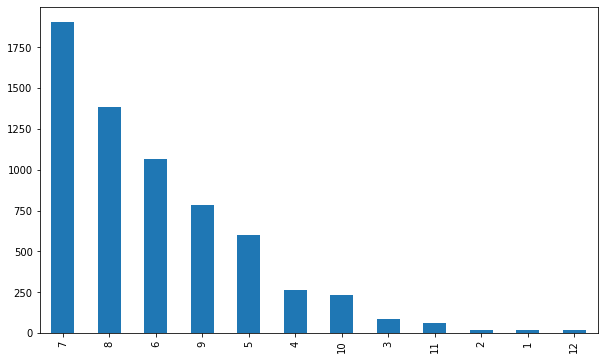

In [26]:
plt.figure(figsize=(10,6))
data.month.value_counts().plot.bar()

**Good but it doesn't show linearity, and is plain.  We can write a function to make a nice time series analysis of this**  
**First we are going to make a new pandas df from our existing one**

In [27]:
import pandas as pd

value_counts = df['month'].value_counts(dropna=True, sort=True)

# solution here
data_val_counts_month = pd.DataFrame(value_counts)
data_value_counts_month = data_val_counts_month.reset_index()
data_value_counts_month.columns = ['unique_values', 'counts'] # change column names

# sort the values by year to time series line doesn't get fucked up
data_value_counts_month = data_value_counts_month.sort_values(by=['unique_values'])  
data_value_counts_month.head()

,unique_values,counts
10,1,17
9,2,21
7,3,86
5,4,264
4,5,602


**We created a new pandas df using month.value_counts() from our original cleaned df**

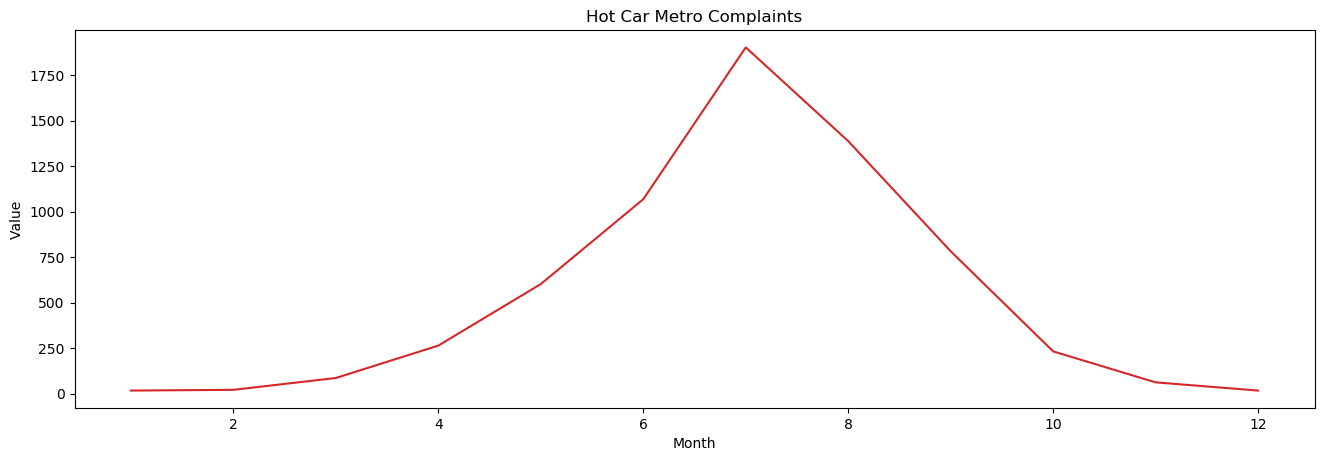

In [28]:
# Draw Plot
def plot_df(data, x, y, title="", xlabel='Month', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data_value_counts_month, x=data_value_counts_month.unique_values, y=data_value_counts_month.counts, title= "Hot Car Metro Complaints")   

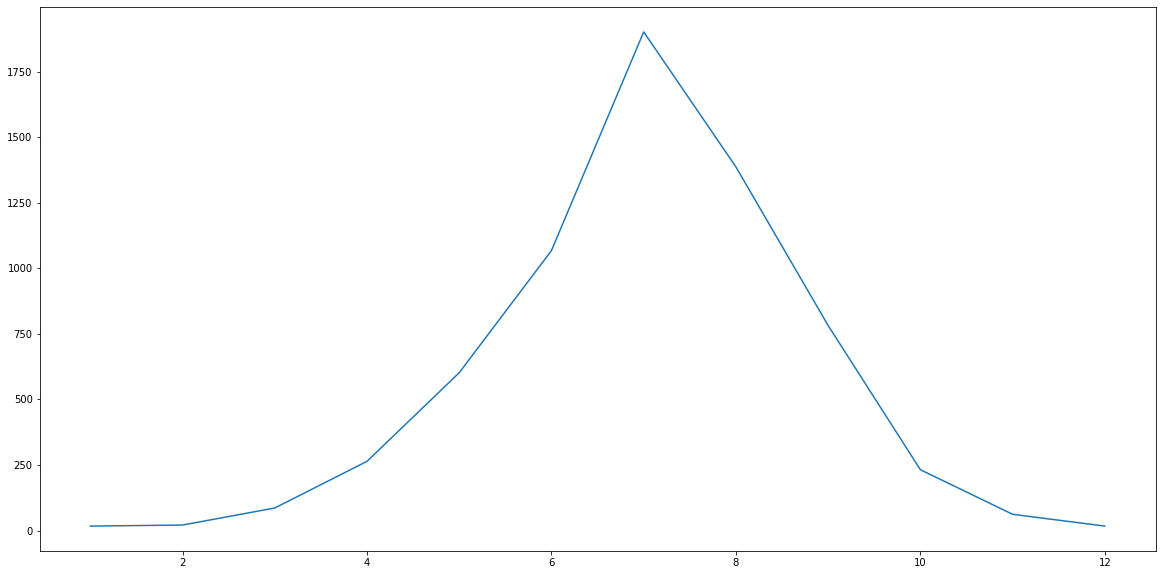

In [29]:
plt.figure(figsize=(20,10))
plt.plot('unique_values', 'counts', data=data_value_counts_month)

# Year Analysis

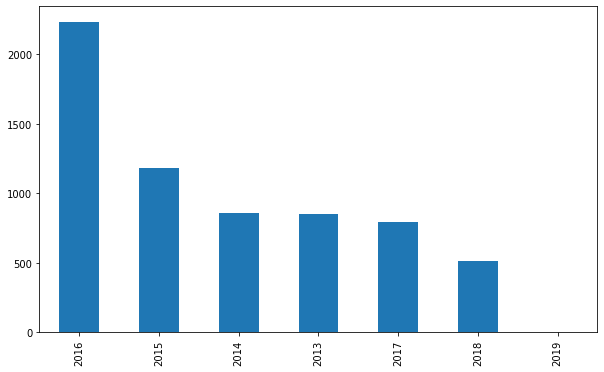

In [30]:
plt.figure(figsize=(10,6))
df.year.value_counts().plot.bar()

In [31]:
value_counts = df['year'].value_counts(dropna=True, sort=True)

# making a new df 
data_val_counts_year = pd.DataFrame(value_counts)
data_value_counts_year = data_val_counts_year.reset_index()
data_value_counts_year.columns = ['unique_values', 'counts'] # change column names

# sort the values by year to time series line doesn't get messed up
data_value_counts_year = data_value_counts_year.sort_values(by=['unique_values'])

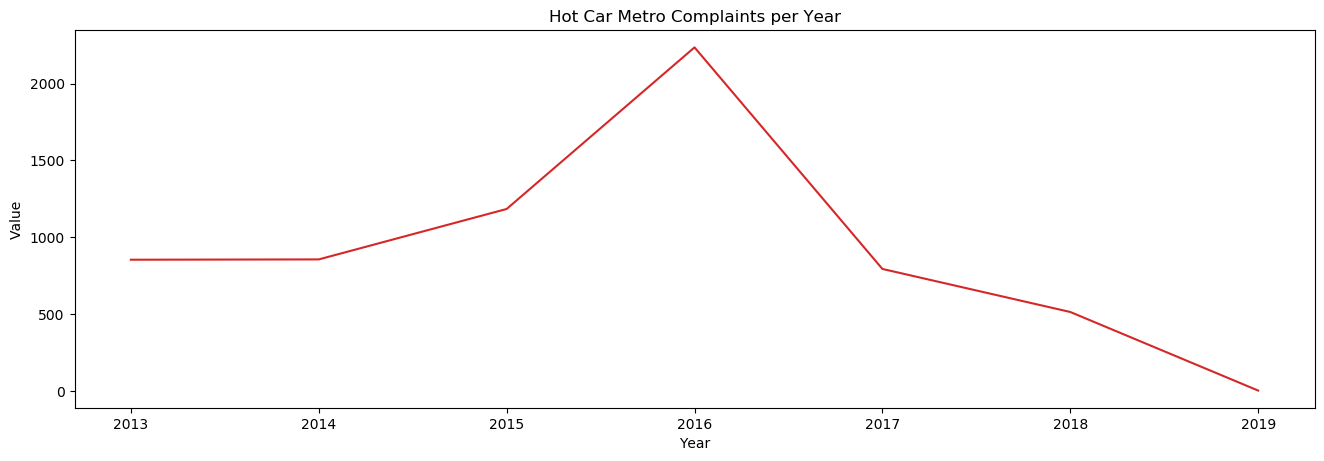

In [32]:
# Draw Plot
def plot_df(data, x, y, title="", xlabel='Year', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data_value_counts_year, x=data_value_counts_year.unique_values, y=data_value_counts_year.counts, title='Hot Car Metro Complaints per Year')   

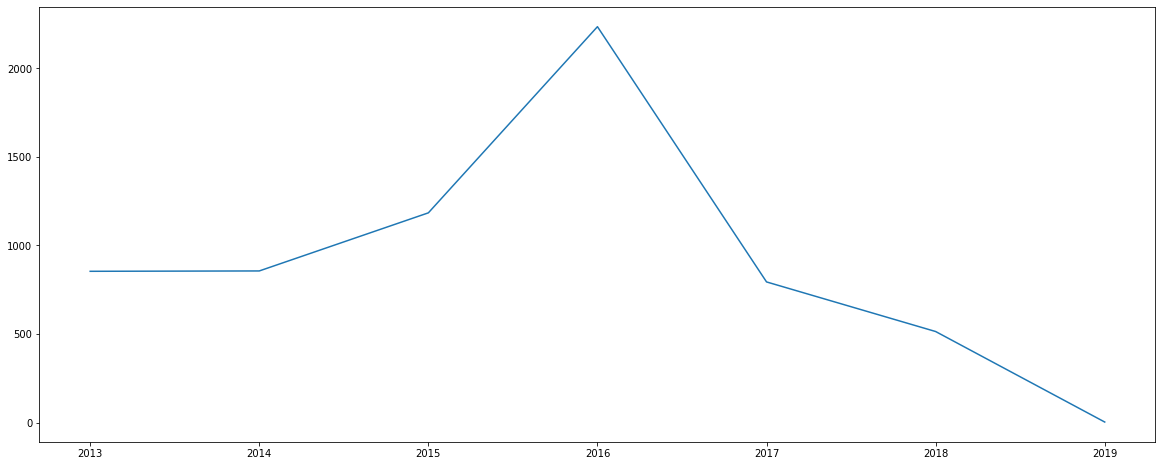

In [33]:
plt.figure(figsize=(20,8))
plt.plot('unique_values', 'counts', data=data_value_counts_year)

# Week Day Analysis

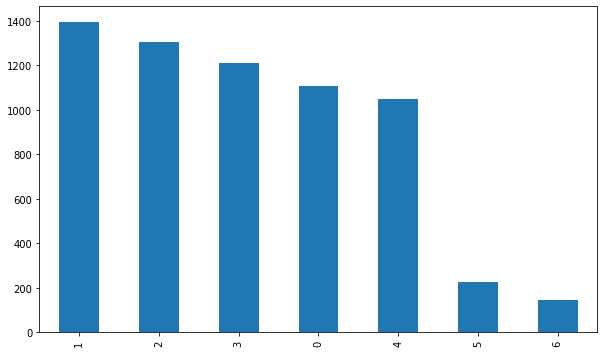

In [34]:
plt.figure(figsize=(10,6))
data.weekday.value_counts().plot.bar()

In [35]:
value_counts = df['weekday'].value_counts(dropna=True, sort=True)

# solution here
data_val_counts_wd = pd.DataFrame(value_counts)
data_value_counts_wd = data_val_counts_wd.reset_index()
data_value_counts_wd.columns = ['unique_values', 'counts'] # change column names

# sort the values by year to time series line doesn't get messed up
data_value_counts_wd = data_value_counts_wd.sort_values(by=['unique_values'])

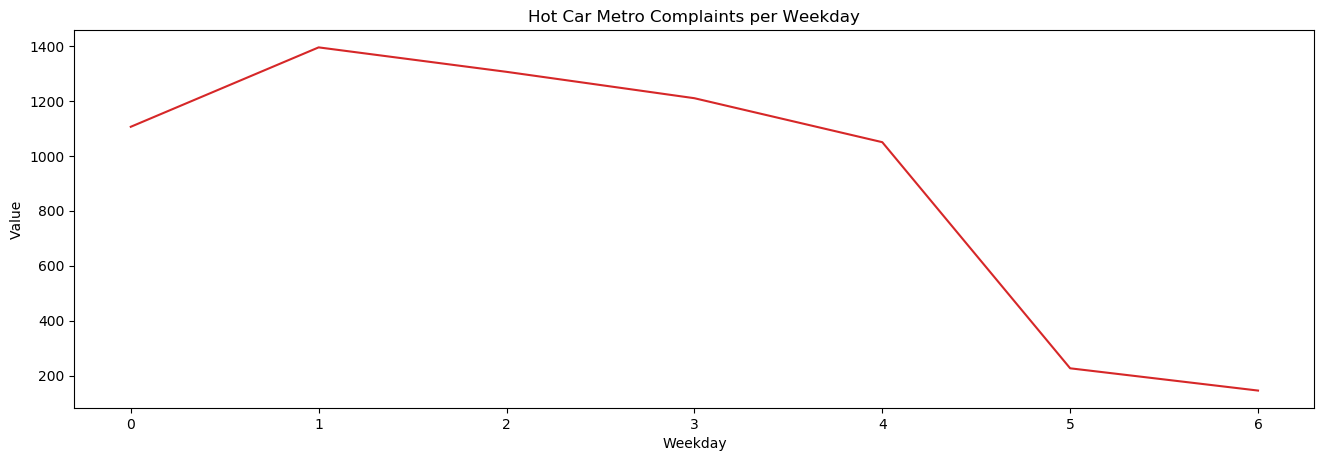

In [36]:

# Draw Plot
def plot_df(data, x, y, title="", xlabel='Weekday', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data_value_counts_wd, x=data_value_counts_wd.unique_values, y=data_value_counts_wd.counts, title='Hot Car Metro Complaints per Weekday') 

# By Year and Month

Lets try to do a time series analysis that seperates the years and months of the hotcar complaints

In [1]:
df.year.value_counts()

NameError: name 'df' is not defined

### Never do it this way

In [38]:
df_2013 = df.loc[df['year'] == 2013]
df_2014 = df.loc[df['year'] == 2014]
df_2015 = df.loc[df['year'] == 2015]
df_2016 = df.loc[df['year'] == 2016]
df_2017 = df.loc[df['year'] == 2017]
df_2018 = df.loc[df['year'] == 2018]
df_2019 = df.loc[df['year'] == 2019]

#2013
value_counts = df_2013['month'].value_counts(dropna=True, sort=True)
df_2013 = pd.DataFrame(value_counts)
df_2013 = df_2013.reset_index()
df_2013.columns = ['unique_values', 'counts'] # change column names
df_2013 = df_2013.sort_values(by=['unique_values'])

#2014
value_counts = df_2014['month'].value_counts(dropna=True, sort=True)
df_2014 = pd.DataFrame(value_counts)
df_2014 = df_2014.reset_index()
df_2014.columns = ['unique_values', 'counts'] # change column names
df_2014 = df_2014.sort_values(by=['unique_values'])

#2015
value_counts = df_2015['month'].value_counts(dropna=True, sort=True)
df_2015 = pd.DataFrame(value_counts)
df_2015 = df_2015.reset_index()
df_2015.columns = ['unique_values', 'counts'] # change column names
df_2015 = df_2015.sort_values(by=['unique_values'])

#2016
value_counts = df_2016['month'].value_counts(dropna=True, sort=True)
df_2016 = pd.DataFrame(value_counts)
df_2016 = df_2016.reset_index()
df_2016.columns = ['unique_values', 'counts'] # change column names
df_2016 = df_2016.sort_values(by=['unique_values'])

#2017
value_counts = df_2017['month'].value_counts(dropna=True, sort=True)
df_2017 = pd.DataFrame(value_counts)
df_2017 = df_2017.reset_index()
df_2017.columns = ['unique_values', 'counts'] # change column names
df_2017 = df_2017.sort_values(by=['unique_values'])

#2018
value_counts = df_2018['month'].value_counts(dropna=True, sort=True)
df_2018 = pd.DataFrame(value_counts)
df_2018 = df_2018.reset_index()
df_2018.columns = ['unique_values', 'counts'] # change column names
df_2018 = df_2018.sort_values(by=['unique_values'])

#2019
value_counts = df_2019['month'].value_counts(dropna=True, sort=True)
df_2019 = pd.DataFrame(value_counts)
df_2019 = df_2019.reset_index()
df_2019.columns = ['unique_values', 'counts'] # change column names
df_2019 = df_2019.sort_values(by=['unique_values'])

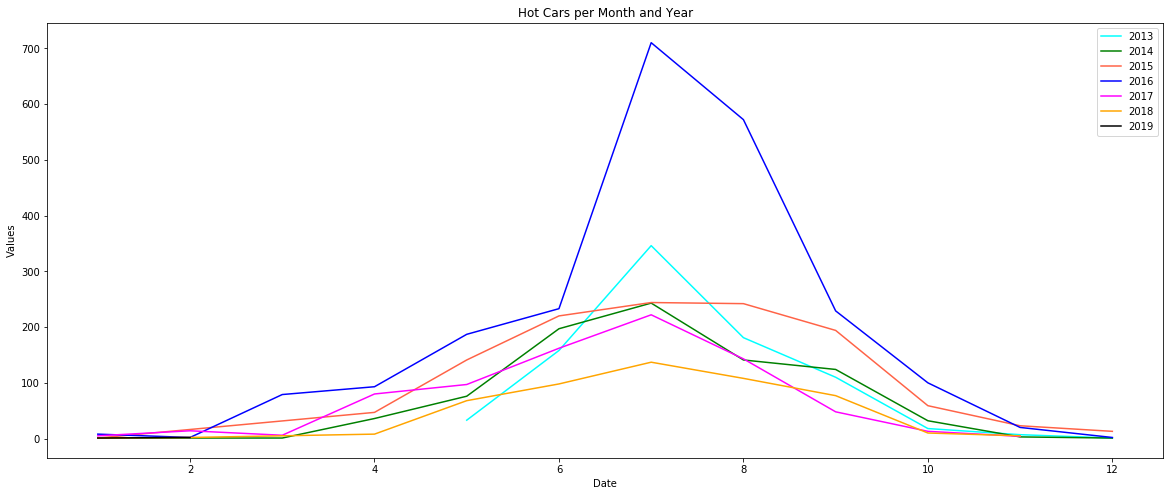

In [39]:
plt.figure(figsize=(20,8))

p1 = plt.plot('unique_values', 'counts', data=df_2013, color = 'cyan', label = '2013')
p2 = plt.plot('unique_values', 'counts', data=df_2014, color = 'green', label = '2014')
p3 = plt.plot('unique_values', 'counts', data=df_2015, color = 'tomato', label = '2015')
p4 = plt.plot('unique_values', 'counts', data=df_2016, color = 'blue', label = '2016')
p5 = plt.plot('unique_values', 'counts', data=df_2017, color = 'magenta', label = '2017')
p6 = plt.plot('unique_values', 'counts', data=df_2018, color = 'orange', label = '2018')
p7 = plt.plot('unique_values', 'counts', data=df_2019, color = 'black', label = '2019')

plt.title('Hot Cars per Month and Year')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()


### Instead, do it this way

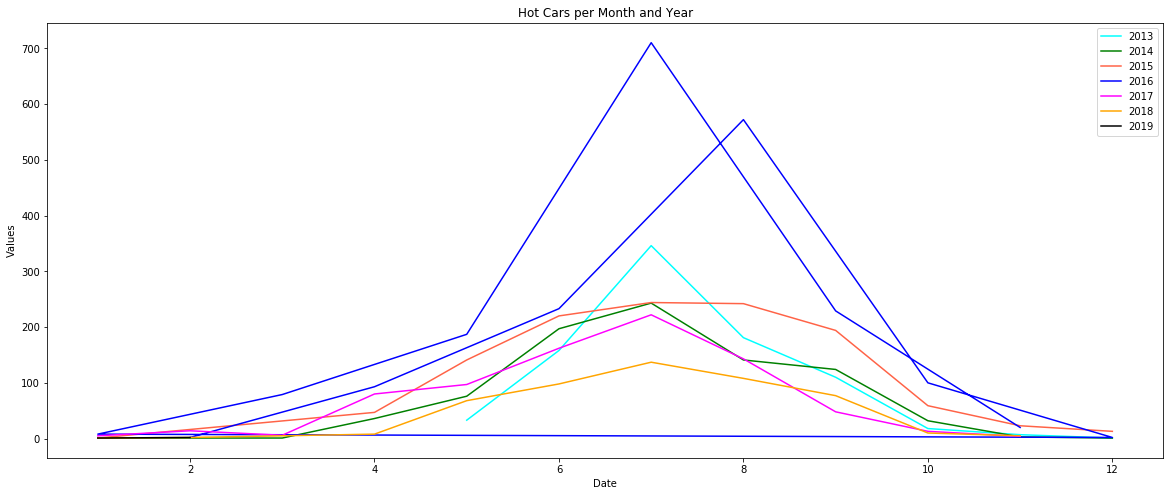

In [41]:
def plot_easy(y13, y14, y15, y16, y17, y18, y19):
    plt.figure(figsize = (20, 8))
    plt.plot(y13, label = '2013', color = 'cyan')
    plt.plot(y14, label = '2014', color = 'green')
    plt.plot(y15, label = '2015', color = 'tomato')
    plt.plot(y16, label = '2016', color = 'blue')
    plt.plot(y17, label = '2017', color = 'magenta')
    plt.plot(y18, label = '2018', color = 'orange')
    plt.plot(y19, label = '2019', color = 'black')
    plt.title('Hot Cars per Month and Year')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()
    
plot_easy(y13, y14, y15, y16, y17, y18, y19)

**It looks like we're getting something weight going on with y16 so we'll have to fix that.  Either way this takes about a fraction of the time**